In [1]:
# import libraries

import nltk
from nltk.stem import PorterStemmer , WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize , word_tokenize
import requests
from bs4 import BeautifulSoup as bs
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
import re

In [2]:
# creating empty reviews list
iphone13_reviews=[]

# Extracting reviews from Amazon website
for i in range(2,19):
    ip=[]  

url = 'https://www.amazon.in/Apple-iPhone-Pro-Max-128GB/product-reviews/B09G9HR5GX'
response = requests.get(url)
soup = bs(response.content,"html.parser")# creating soup object to iterate over the extracted content 
reviews = soup.findAll("span",attrs={"class","a-size-base review-text review-text-content"})
for i in range(len(reviews)):
    ip.append(reviews[i].text)  
    iphone13_reviews=iphone13_reviews+ip

# writng reviews in a text file 
with open("iphone13.txt","w",encoding='utf8') as output:
    output.write(str(iphone13_reviews))

In [3]:
iphone13_reviews

["\nIt's a very powerful phone with great camera features. I am really happy with this iPhone.\n",
 "\nIt's a very powerful phone with great camera features. I am really happy with this iPhone.\n",
 '\nHigh benefits with high price. I m in love with this device.\n',
 "\nIt's a very powerful phone with great camera features. I am really happy with this iPhone.\n",
 '\nHigh benefits with high price. I m in love with this device.\n',
 '\nSwitched from Android to iPhone. Here are my pros and cons.Pros:1) The battery life on the Pro Max is just excellent. No android with even a 6000 Mah can beat it, it is that well optimised.2) The camera as you can guess is one of the best if not the best.3) The screen with 120hz feels so smooth. It’s just a different experience. Androids with similar refresh don’t feel so smooth because they are poorly optimised.Cons:1) The price. Got the 512GB pro max for 1.55 lac. and that is not at all value for the amount of money you spend. With no charger!2) Softwar

In [4]:
 # Joinining all the reviews into single paragraph 
ip_rev = " ".join(iphone13_reviews)

In [5]:
# Removing unwanted symbols incase if exists
ip_rev = re.sub("[^A-Za-z" "]+"," ",ip_rev).lower()
ip_rev = re.sub("[0-9" "]+"," ",ip_rev)

In [6]:
# words that contained in iphone 7 reviews
ip_words = ip_rev.split(" ")
print(ip_words)
# stop_words = stopwords.words('english')

['', 'it', 's', 'a', 'very', 'powerful', 'phone', 'with', 'great', 'camera', 'features', 'i', 'am', 'really', 'happy', 'with', 'this', 'iphone', 'it', 's', 'a', 'very', 'powerful', 'phone', 'with', 'great', 'camera', 'features', 'i', 'am', 'really', 'happy', 'with', 'this', 'iphone', 'high', 'benefits', 'with', 'high', 'price', 'i', 'm', 'in', 'love', 'with', 'this', 'device', 'it', 's', 'a', 'very', 'powerful', 'phone', 'with', 'great', 'camera', 'features', 'i', 'am', 'really', 'happy', 'with', 'this', 'iphone', 'high', 'benefits', 'with', 'high', 'price', 'i', 'm', 'in', 'love', 'with', 'this', 'device', 'switched', 'from', 'android', 'to', 'iphone', 'here', 'are', 'my', 'pros', 'and', 'cons', 'pros', 'the', 'battery', 'life', 'on', 'the', 'pro', 'max', 'is', 'just', 'excellent', 'no', 'android', 'with', 'even', 'a', 'mah', 'can', 'beat', 'it', 'it', 'is', 'that', 'well', 'optimised', 'the', 'camera', 'as', 'you', 'can', 'guess', 'is', 'one', 'of', 'the', 'best', 'if', 'not', 'the',

In [7]:
word_list = ' '.join(ip)
wordcloud = WordCloud(background_color='black',
                      width=1800,
                      height=1400).generate(word_list)

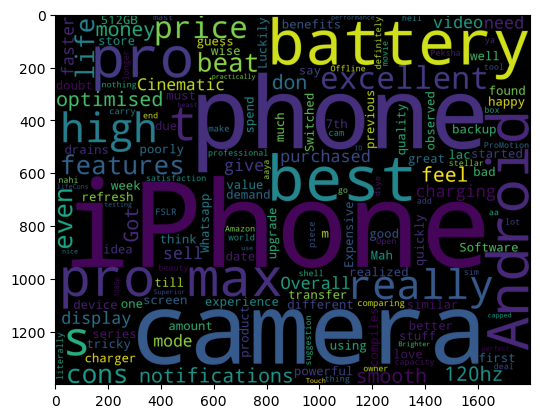

In [8]:
plt.imshow(wordcloud)

In [9]:
# positive words # Choose the path for +ve words stored in system

with open(r"C:\Users\Prerana\Downloads\positive-words.txt","r") as ps:
    pwords = ps.read().split("\n")

In [10]:
# Choosing the only words which are present in positive words
ip_pos = " ".join ([w for w in ip_words if w in pwords])

In [11]:
# Positive word cloud
wc_ps = WordCloud(
                      background_color='black',
                      width=3000,
                      height=2400
                     ).generate(ip_pos)

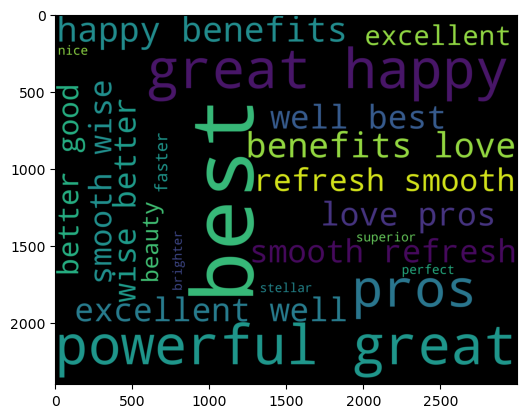

In [12]:
plt.imshow(wc_ps)

In [13]:
# negative words  Choose path for -ve words stored in system
with open(r"C:\Users\Prerana\Downloads\negative-words.txt","r") as ng:
    ngwords = ng.read().split("\n")

In [14]:
# Choosing the only words which are present in negwords
ip_neg = " ".join ([w for w in ip_words if w in ngwords])

In [16]:
# Choosing the only words which are present in negwords
ip_neg = " ".join ([w for w in ip_words if w in ngwords])
# negative word cloud
wc_ng = WordCloud(
                      background_color='black',
                      width=3000,
                      height=2000
                     ).generate(ip_neg)

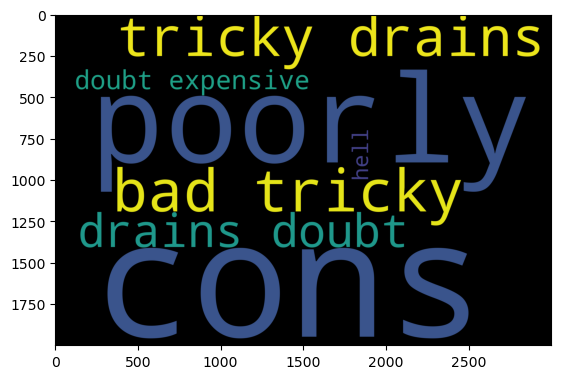

In [17]:
plt.imshow(wc_ng)